# PHY480/905 Semester Project 

#### PHY 480/905 Semester Project
### &#9989; Dhiti Doddamreddy
#### &#9989; Last Updated on 4/14/24

# Comparative Analysis of Numerical Methods for Solving Electrostatic Potentials in  a Rectangular Pipe

##  Introduction 

This project explores the numerical conclusions of electrostatic potentials within a rectangular pipe, a scenario that represents a real-world application in physics and engineering. This analysis focus on implementing and comparing three iterative numerical methods: Jacobi, Gauss-Seidel, and Successive Overrelaxation (SOR), each offering different approaches to approximating solutions to the Laplace or Poisson equations that determine electrostatic occurences. By evaluating the convergence rates, number of iterations, and time it takes to calculate, this project aims to highlight their respective strengths and limitations in solving electrostatic potential problems. Through this analysis, we can provide insights into selecting the most appropriate method for specific applications. 


## Methodology:

Let's learn about these three methods and how they work. The first method is the Jacobi Method.

The __Jacobi Method__ is an interative algorithm used for solving linear systems of equations, especially discretizing differential equations. The Jacobi method can be applied to the discretized Laplace or Poisson equation.

The Jacobi method considers a system of linear equations reporesented in matrix form as $Ax = b$ where:

- $A$ is a square matric of coefficients
- $x$ is a column vector of unknown variables
- $b$ is a cloumn vector on constants

The method iteratively updates each element of $x$ based on the formula dericed from $Ax = b$, rearranged to isolate the diagonal element of A. This gives us the equation below:

$$
x_i^{(k+1)}=\frac{b_i-\sum_{j=1, j\ne i}^{n}a_{ij}x_j^{(k)}}{a_{ii}}
$$

- $x_i^{(k+1)}$ is the value of the $i$-th variable at the $(k + 1)$-th iteraction
- $a_{ii}$ is the $i$-th diagonal element of $A$
- $b_i$ is the $i$-th element of $b$
- The sum is over $j$, exluding $i$, using values of x from the previosu iteration $k$.

In the context of the project, each point's potential is updated based on the average of its neighbors' potentials following the formula above intol the potential disctribution converges to a stable orientation.

The __Gauss-Seidel's Method__ is an improved version of the Jacobi method, where it uses the latest updated valies to accelerate convergence.

It follows the same system of linear equationsin matrix form, $Ax = b$, where the variables are defined to be the same as mentioned in the Jacobi Method. 

In each iteration, the Gausss-Seifel method updates each component of $x$ sequentially from the first to the last. The formula used to upate the $i$-th component is below:

$$
x^{(k+1)}_i = \frac{1}{a_{ii}} \left(b_i - \sum_{j < i}a_{ij}x^{(k+1)}_j - \sum_{j > i}a_{ij}x^{(k)}_j \right),\quad i\in\{1,2,\ldots,n\}.
$$

-  $x_i^{(k+1)}$ is the value of the $i$-th variable at the $(k + 1)$-th iteraction
- $a_{ii}$ is the $i$-th diagonal element of $A$
- $b_i$ is the $i$-th element of $b$
- The first sum runs over all previously updated elements in the current iteration $(x_j^{k+1} for j < i)$ using the most recent values.
- The second sum runs over all future elemetns in the curremt iteration $(x_j^{k} for j > i)$, using values from the previous iteration.

The __Successive Overrelaxation Method (SOR)__ enhaces the Gauss-Seidel method by introducting a relaxation factor. This method is effective for systems where the Gauss-Seidel method converges slowly. 

Once again let's follow the same linear equation represented as $Ax = b$, where all the variables represent the same things as in the Jacobi and Gauss-Seidel method.

The SOR method updates each component of x by using the most recent value but also applying a relaxation factor $(\omega)$ tp the update value. This formula is below:


$$
x_i^{(\text{new})} = (1-\omega)x_i^{(\text{old})} + \frac{\omega}{a_{ii}}\left(b_i - \sum_{j=1}^{i-1}a_{ij}x_j^{(\text{new})} - \sum_{j=i+1}^{n}a_{ij}x_j^{(\text{old})}\right)
$$

-  $x_i^{(k+1)}$ is the value of the $i$-th variable at the $(k + 1)$-th iteraction
- $a_{ii}$ is the $i$-th diagonal element of $A$
- $b_i$ is the $i$-th element of $b$
- $\omega$ is the relaxation factor, with typical values between 1 and 2. The choide of $\omega$ signitficantly impcts the convergence rate, where $\omega$ > 1 attemps to overcorrect the update step. This is why it is called overrelaxation. 


### Part 1: Setting Up Problem
Let's first define the geometry within the rectangular pipe we are looking at.

Let's consider a rectangular pipe lying in the $xy$-plane, with lenght $L$ along the $x$-axis and height $H$ along the $y$-axis. The corner of our rectangular pipe, according to our axis, are located at coordinates: $(0,0)$, $(L,0)$, $(L,H)$, and $(0,H)$. 

Infinite in the Z direction



### Part 1.1: Defining the Problem Parameters in Code

In [1]:
import numpy as np

#Parameters
L = 1.0  # length of the pipe in the x-direction (meters)
H = 1.0  # height of the pipe in the y-direction (meters)

#Size of Mesh
Nx = 50  # number of grid points in the x-direction
Ny = 50  # number of grid points in the y-direction
dx = L / (Nx - 1)  # distance between grid points in the x-direction
dy = H / (Ny - 1)  # distance between grid points in the y-direction

### Part 1.2: Defining the Boundary Conditions
We must specificy the boundary conditions. To begin let's assuming these conditions:

Three of the sides are grounded, which means the potential $\Phi$ is set to zero on 3 sides of pipe representing grounded boundaries. This is how it would look mathematically:

- $\Phi(0,y) = 0$ for the left side
- $\Phi(L,y) = 0$ for the right side
- $\Phi(x,0) = 0$ for the bottom side

For the fourth side, the top side of the pipe, has a specific potential of $V_0$. This then means $\Phi(x,H) = V_0$. For the first part of the analysis we are keeping $V_0$ constant at 1.

In [2]:
#Initializing potential array
potential = np.zeros((Ny, Nx))

#Boundary conditions
V_0 = 1

#Applying boundary contitions
potential[:, 0] = 0  # Left side
potential[:, -1] = 0  # Right side
potential[0, :] = 0  # Bottom side
potential[-1, :] = V_0  # Top side

Now that we have set up the problem and parameters we can start implementing the different numerical methods to see how the outcomes.

### Part 1.3: Implementing Jacobi Method

Jacobi Method: Converged in 5498 iterations, taking 10.8423 seconds.


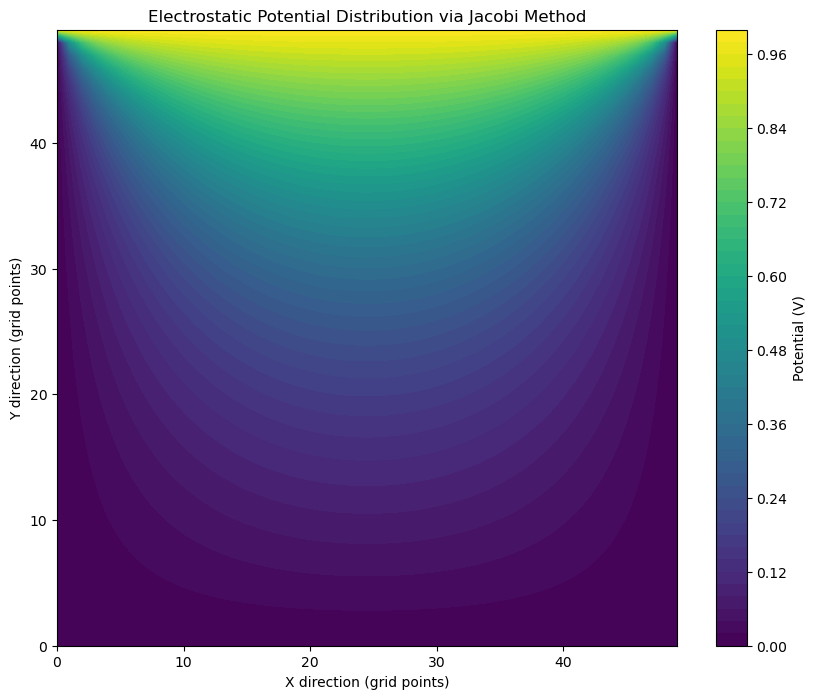

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

def calculate_error(old_potential, new_potential):
    """
    Calculate the total relative error between two potential distributions.

    Parameters:
    - old_potential (np.ndarray): The potential distribution from the previous iteration.
    - new_potential (np.ndarray): The updated potential distribution from the current iteration.

    Returns:
    - float: The sum of the absolute relative errors across all points in the grid.
    """
    errs = np.abs((new_potential - old_potential) / np.where(new_potential != 0, new_potential, 1))
    return np.sum(errs)

def jacobi(potential, kmax=10000, tol=1e-4):
    """
    Solve the electrostatic potential using the Jacobi iterative method.

    Parameters:
    - potential (np.ndarray): The initial grid of potential values, including boundary conditions.
    - kmax (int): The maximum number of iterations to perform.
    - tol (float): The tolerance for convergence, based on the total error.

    Returns:
    - np.ndarray: The converged potential distribution, or None if convergence was not achieved.
    - int: The number of iterations performed.
    - float: The execution time in seconds.
    """
    start_time = time.time()  # Start the timer
    Ny, Nx = potential.shape
    for k in range(kmax):
        old_potential = np.copy(potential)
        for i in range(1, Ny - 1):
            for j in range(1, Nx - 1):
                potential[i, j] = 0.25 * (old_potential[i+1, j] + old_potential[i-1, j] +
                                          old_potential[i, j+1] + old_potential[i, j-1])
        
        err = calculate_error(old_potential[1:-1, 1:-1], potential[1:-1, 1:-1])
        if err < tol:
            j_time = time.time() - start_time
            return potential, k + 1, j_time
    execution_time = time.time() - start_time  # Time if not converged within kmax
    return None, kmax, j_time

# Problem setup
L, H = 1.0, 1.0  # Pipe dimensions
Nx, Ny = 50, 50  # Grid size
V_0 = 1  # Boundary condition at the top

# Initialize potential array and set boundary conditions
potential = np.zeros((Ny, Nx))
potential[:, 0] = 0  # Left side
potential[:, -1] = 0  # Right side
potential[0, :] = 0  # Bottom side
potential[-1, :] = V_0  # Top side

solved_potential, j_iterations, j_time = jacobi(potential)
print(f"Jacobi Method: Converged in {j_iterations} iterations, taking {j_time:.4f} seconds.")

# Visualization created only if convergence occurred
if solved_potential is not None:
    plt.figure(figsize=(10, 8))
    plt.contourf(solved_potential, 50, cmap='viridis')
    plt.colorbar(label='Potential (V)')
    plt.title('Electrostatic Potential Distribution via Jacobi Method')
    plt.xlabel('X direction (grid points)')
    plt.ylabel('Y direction (grid points)')
    plt.show()


We are expected to see the same graphical outcome for all the methods as they are finding the same electrostatic potential in the pipe but we will find variation in the interation times.

### Part 1.4: Implementing Gauss-Seidel Method

The overall code will look the same for the Gauss-Seidel Method as it is for the Jacobi method. In the Jacobi method, the calculations of the new potential value at each grid point uses only the old values from the previous iteration. The Gauss-Seidel method updates the potential values in place and immpedately uses the updated values for calculations in the same iteration.

Gauss-Seidel Method: Converged in 2935 iterations, taking 5.7673 seconds.


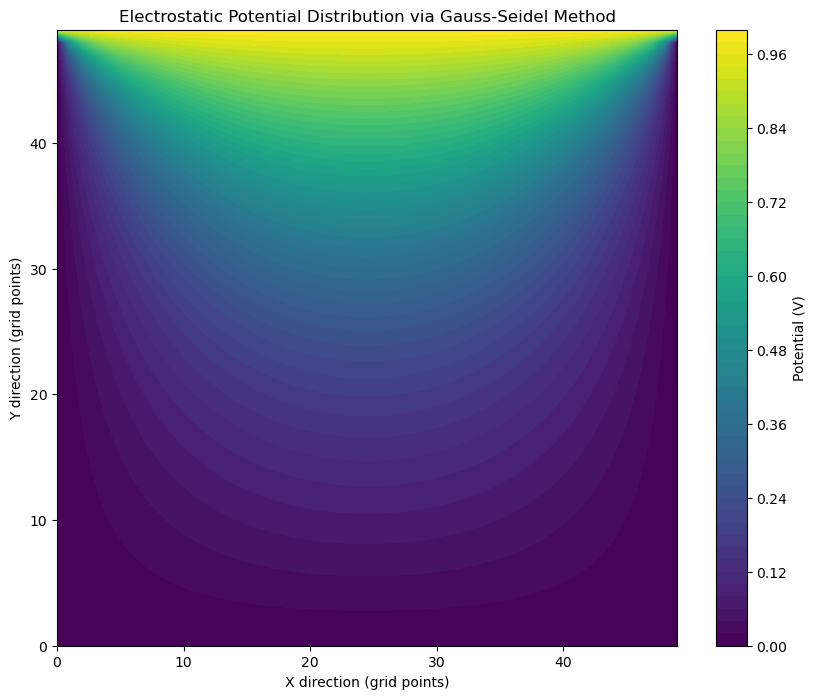

In [4]:
import numpy as np
import time
import matplotlib.pyplot as plt

def calculate_error(old_potential, new_potential):
    """
    Calculate the total relative error between two potential distributions.

    Parameters:
    - old_potential (np.ndarray): The potential distribution from the previous iteration.
    - new_potential (np.ndarray): The updated potential distribution from the current iteration.

    Returns:
    - float: The sum of the absolute relative errors across all points in the grid.
    """
    errs = np.abs((new_potential - old_potential) / np.where(new_potential != 0, new_potential, 1))
    return np.sum(errs)

def gauss_seidel(potential, kmax=10000, tol=1e-4):
    """
    Solve the electrostatic potential using the Gauss-Seidel iterative method.

    Parameters:
    - potential (np.ndarray): The initial grid of potential values, including boundary conditions.
    - kmax (int): The maximum number of iterations to perform.
    - tol (float): The tolerance for convergence, based on the total error.

    Returns:
    - np.ndarray: The converged potential distribution, or None if convergence was not achieved.
    - int: The number of iterations performed.
    - float: The execution time in seconds.
    """
    start_time = time.time()
    Ny, Nx = potential.shape
    for k in range(kmax):
        old_potential = np.copy(potential)
        for i in range(1, Ny - 1):
            for j in range(1, Nx - 1):
                potential[i, j] = 0.25 * (potential[i+1, j] + potential[i-1, j] + 
                                          potential[i, j+1] + potential[i, j-1])
        
        err = calculate_error(old_potential[1:-1, 1:-1], potential[1:-1, 1:-1])
        if err < tol:
            g_time = time.time() - start_time
            return potential, k + 1, g_time
    g_time = time.time() - start_time
    return None, kmax, g_time

# Problem setup
L, H = 1.0, 1.0  # Pipe dimensions
Nx, Ny = 50, 50  # Grid size
V_0 = 1  # Boundary condition at the top

# Initialize potential array and set boundary conditions
potential = np.zeros((Ny, Nx))
potential[:, 0] = 0  # Left side
potential[:, -1] = 0  # Right side
potential[0, :] = 0  # Bottom side
potential[-1, :] = V_0  # Top side


solved_potential, g_iterations, g_time = gauss_seidel(potential)
print(f"Gauss-Seidel Method: Converged in {g_iterations} iterations, taking {g_time:.4f} seconds.")

# Visualization
if solved_potential is not None:
    plt.figure(figsize=(10, 8))
    plt.contourf(solved_potential, 50, cmap='viridis')
    plt.colorbar(label='Potential (V)')
    plt.title('Electrostatic Potential Distribution via Gauss-Seidel Method')
    plt.xlabel('X direction (grid points)')
    plt.ylabel('Y direction (grid points)')
    plt.show()


Now lets implement the last method and see how the code differs for this method in comparison to the Jacobi and Gauss-Seidel method.

### Part 1.5: Implementing Successive Overrelaxation Method 

Once again the overall code between the three methods will look the same, however the key difference is the inclusion of the relaxation factor $\omega$ in this code. The SOR uses the relaxation factor and implements it in the update formula. The factor is used to scale the difference between the current value and the newly calculated one.

SOR Method (ω=1.5): Converged in 1072 iterations, taking 3.3435 seconds.


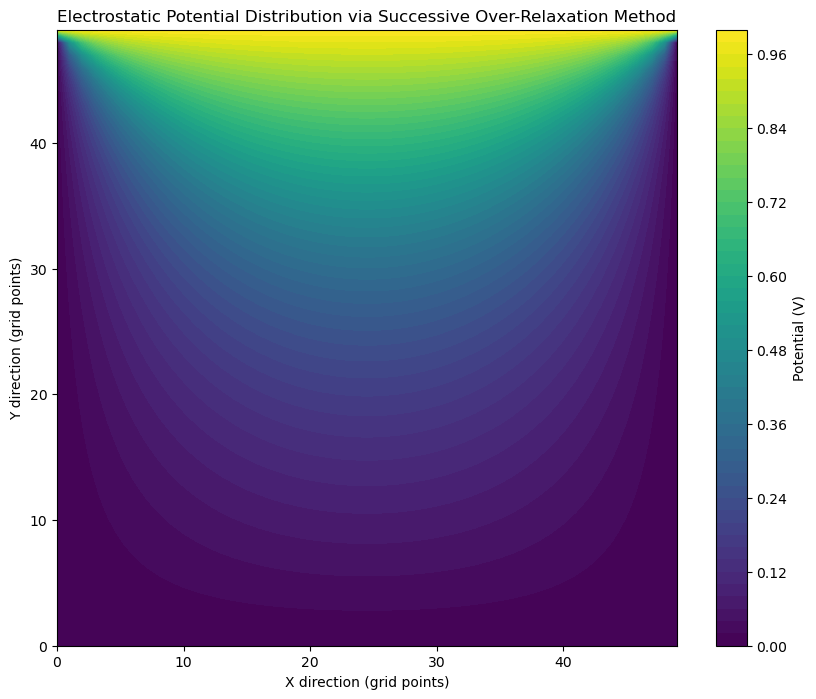

In [13]:
import numpy as np
import time
import matplotlib.pyplot as plt

def calculate_error(old_potential, new_potential):
    """
    Calculate the total relative error between two potential distributions.
    
    Parameters:
    - old_potential (np.ndarray): The potential distribution from the previous iteration.
    - new_potential (np.ndarray): The updated potential distribution from the current iteration.
    
    Returns:
    - float: The sum of the absolute relative errors across all points in the grid.
    """
    errs = np.abs((new_potential - old_potential) / np.where(new_potential != 0, new_potential, 1))
    return np.sum(errs)

def SOR(potential, omega, kmax=10000, tol=1e-4):
    """
    Solve the electrostatic potential using the Successive Overrelaxation (SOR) method.
    
    Parameters:
    - potential (np.ndarray): The initial grid of potential values, including boundary conditions.
    - omega (float): The relaxation factor used to accelerate convergence.
    - kmax (int): The maximum number of iterations to perform.
    - tol (float): The tolerance for convergence, based on the total error.
    
    Returns:
    - np.ndarray: The converged potential distribution, or None if convergence was not achieved.
    - int: The number of iterations performed.
    - float: The execution time in seconds.
    """
    start_time = time.time()
    Ny, Nx = potential.shape
    for k in range(kmax):
        old_potential = np.copy(potential)
        for i in range(1, Ny - 1):
            for j in range(1, Nx - 1):
                new_value = 0.25 * (potential[i+1, j] + potential[i-1, j] +
                                    potential[i, j+1] + potential[i, j-1])
                potential[i, j] = potential[i, j] + omega * (new_value - potential[i, j])
        
        err = calculate_error(old_potential[1:-1, 1:-1], potential[1:-1, 1:-1])
        if err < tol:
            s_time = time.time() - start_time
            return potential, k + 1, s_time
    s_time = time.time() - start_time
    return None, kmax, s_time

# Problem setup
L, H = 1.0, 1.0  # Pipe dimensions
Nx, Ny = 50, 50  # Grid size
V_0 = 1  # Boundary condition at the top

# Initialize potential array and set boundary conditions
potential = np.zeros((Ny, Nx))
potential[:, 0] = 0  # Left side
potential[:, -1] = 0  # Right side
potential[0, :] = 0  # Bottom side
potential[-1, :] = V_0  # Top side



omega = 1.5  # Relaxation factor
solved_potential, s_iterations, s_time = SOR(potential, omega)
print(f"SOR Method (ω={omega}): Converged in {s_iterations} iterations, taking {s_time:.4f} seconds.")

# Visualization
if solved_potential is not None:
    plt.figure(figsize=(10, 8))
    plt.contourf(solved_potential, 50, cmap='viridis')
    plt.colorbar(label='Potential (V)')
    plt.title('Electrostatic Potential Distribution via Successive Over-Relaxation Method')
    plt.xlabel('X direction (grid points)')
    plt.ylabel('Y direction (grid points)')
    plt.show()


### Part 1.5: Comparing the Three Methods

To compare the three methods we can look at the execution time as well as the number of iterations it took to converge to return the final potential disctribution inside the rectangular pipe.

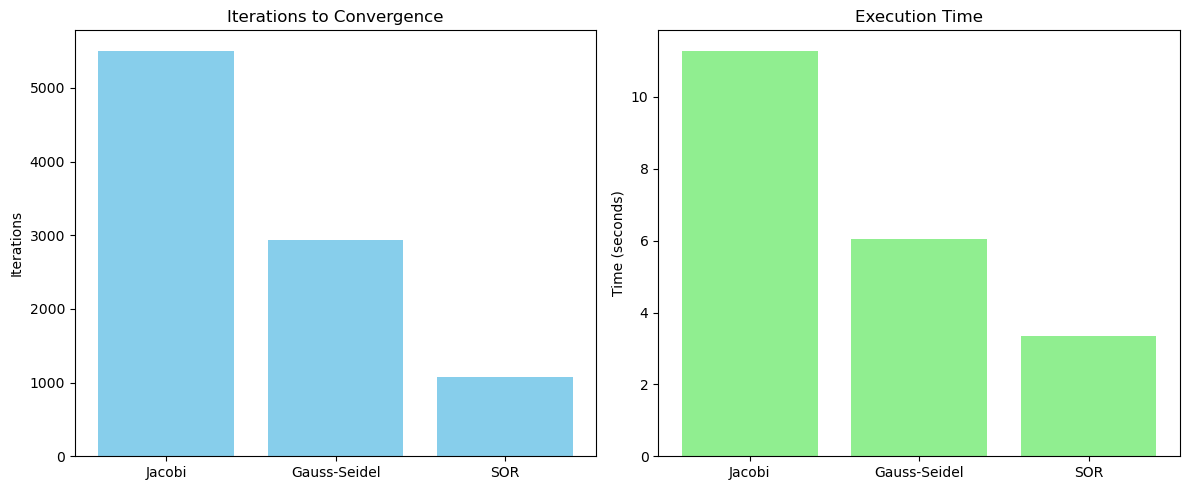

In [17]:
methods = ['Jacobi', 'Gauss-Seidel', 'SOR']
iterations = [j_iterations, g_iterations, s_iterations] 
execution_times = [j_time, g_time, s_time] 

plt.figure(figsize=(12, 5))
# Plotting iterations
plt.subplot(1, 2, 1)
plt.bar(methods, iterations, color='skyblue')
plt.title('Iterations to Convergence')
plt.ylabel('Iterations')

# Plotting execution time
plt.subplot(1, 2, 2)
plt.bar(methods, execution_times, color='lightgreen')
plt.title('Execution Time')
plt.ylabel('Time (seconds)')

plt.tight_layout()
plt.show()


There is a clear difference between the number of iterations each method needs to converge as well as the execution time each method takes. Based on when $V_0$ = 1, the SOR method uses less iterations to converge and takes less time to execute.

### Part 2: Not A Constant Potential

To fruther evaluate the methods, I want to explore how variations in the potential affect the execution time and the number of iterations required for convergence. Instead of making it constant, I used np.linspace to have a varying potential from 0 to $2\pi$.The base parameters such as the length and heigher will remain the same. 

In [7]:
#Parameters
L = 1.0  # length of the pipe in the x-direction (meters)
H = 1.0  # height of the pipe in the y-direction (meters)

#Size of Mesh
Nx = 50  # number of grid points in the x-direction
Ny = 50  # number of grid points in the y-direction
dx = L / (Nx - 1)  # distance between grid points in the x-direction
dy = H / (Ny - 1)  # distance between grid points in the y-direction

In [8]:
#Initializing potential array
potential = np.zeros((Ny, Nx))

#Boundary conditions
V_0 = np.linspace(0,2*np.pi)

#Applying boundary contitions
potential[:, 0] = 0  # Left side
potential[:, -1] = 0  # Right side
potential[0, :] = 0  # Bottom side
potential[-1, :] = V_0  # Top side

### Part 2.1: Jacobi Method with New Potential

Let's rerun the Jacobi Method but with the new updating potential.

Jacobi Method: Converged in 5506 iterations, taking 11.2879 seconds.


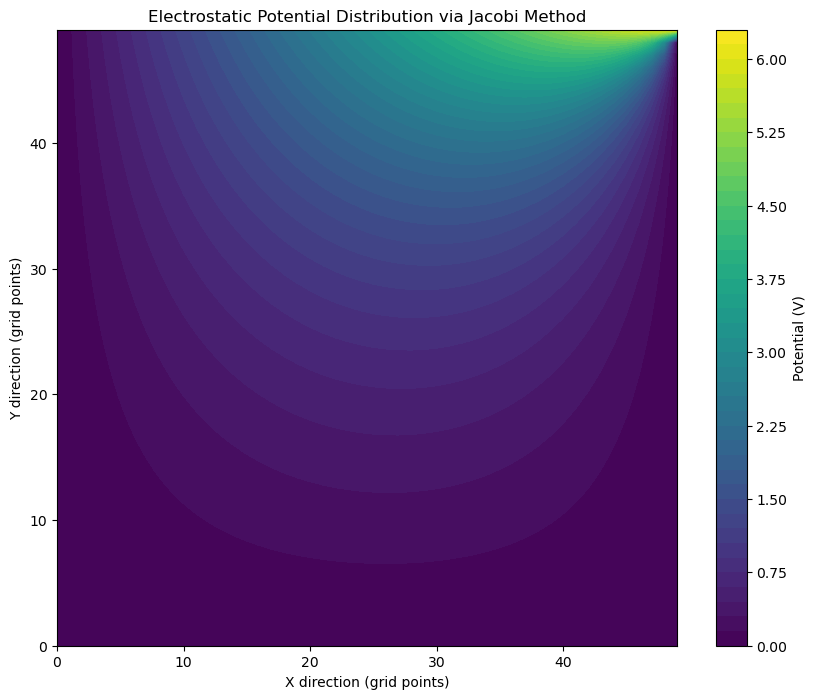

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import time

def calculate_error(old_potential, new_potential):
    """
    Calculate the total relative error between two potential distributions.

    Parameters:
    - old_potential (np.ndarray): The potential distribution from the previous iteration.
    - new_potential (np.ndarray): The updated potential distribution from the current iteration.

    Returns:
    - float: The sum of the absolute relative errors across all points in the grid.
    """
    errs = np.abs((new_potential - old_potential) / np.where(new_potential != 0, new_potential, 1))
    return np.sum(errs)

def jacobi(potential, kmax=10000, tol=1e-4):
    """
    Solve the electrostatic potential using the Jacobi iterative method.

    Parameters:
    - potential (np.ndarray): The initial grid of potential values, including boundary conditions.
    - kmax (int): The maximum number of iterations to perform.
    - tol (float): The tolerance for convergence, based on the total error.

    Returns:
    - np.ndarray: The converged potential distribution, or None if convergence was not achieved.
    - int: The number of iterations performed.
    - float: The execution time in seconds.
    """
    start_time = time.time()  # Start the timer
    Ny, Nx = potential.shape
    for k in range(kmax):
        old_potential = np.copy(potential)
        for i in range(1, Ny - 1):
            for j in range(1, Nx - 1):
                potential[i, j] = 0.25 * (old_potential[i+1, j] + old_potential[i-1, j] +
                                          old_potential[i, j+1] + old_potential[i, j-1])
        
        err = calculate_error(old_potential[1:-1, 1:-1], potential[1:-1, 1:-1])
        if err < tol:
            j_time = time.time() - start_time
            return potential, k + 1, j_time
    execution_time = time.time() - start_time  # Time if not converged within kmax
    return None, kmax, j_time

# Problem setup
L, H = 1.0, 1.0  # Pipe dimensions
Nx, Ny = 50, 50  # Grid size
V_0 = np.linspace(0,2*np.pi)  # Boundary condition at the top

# Initialize potential array and set boundary conditions
potential = np.zeros((Ny, Nx))
potential[:, 0] = 0  # Left side
potential[:, -1] = 0  # Right side
potential[0, :] = 0  # Bottom side
potential[-1, :] = V_0  # Top side

solved_potential, j_iterations, j_time = jacobi(potential)
print(f"Jacobi Method: Converged in {j_iterations} iterations, taking {j_time:.4f} seconds.")

# Visualization created only if convergence occurred
if solved_potential is not None:
    plt.figure(figsize=(10, 8))
    plt.contourf(solved_potential, 50, cmap='viridis')
    plt.colorbar(label='Potential (V)')
    plt.title('Electrostatic Potential Distribution via Jacobi Method')
    plt.xlabel('X direction (grid points)')
    plt.ylabel('Y direction (grid points)')
    plt.show()


### Part 2.2: Gauss-Seidel Method with New Potential

Gauss-Seidel Method: Converged in 2942 iterations, taking 6.0383 seconds.


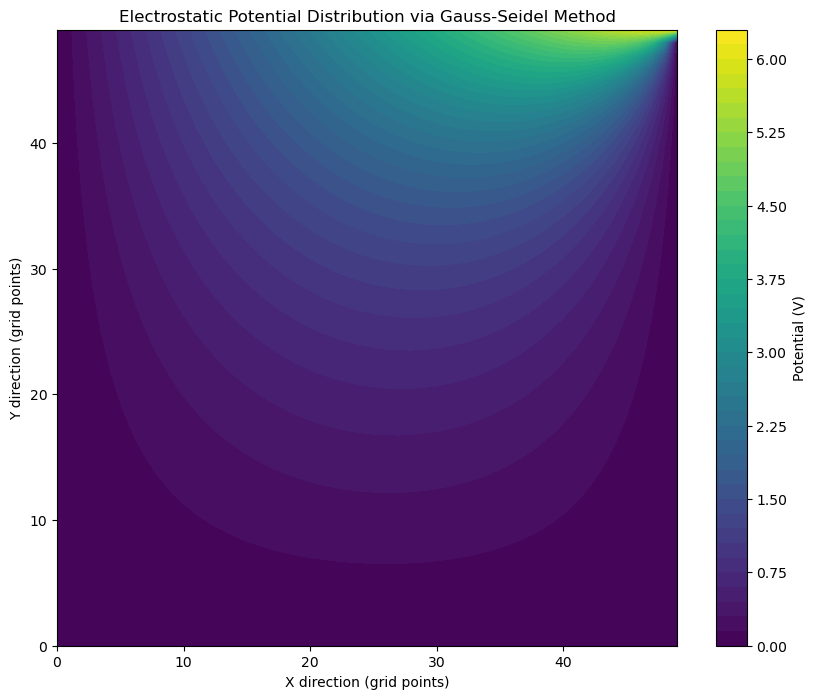

In [10]:
import numpy as np
import time
import matplotlib.pyplot as plt

def calculate_error(old_potential, new_potential):
    """
    Calculate the total relative error between two potential distributions.

    Parameters:
    - old_potential (np.ndarray): The potential distribution from the previous iteration.
    - new_potential (np.ndarray): The updated potential distribution from the current iteration.

    Returns:
    - float: The sum of the absolute relative errors across all points in the grid.
    """
    errs = np.abs((new_potential - old_potential) / np.where(new_potential != 0, new_potential, 1))
    return np.sum(errs)

def gauss_seidel(potential, kmax=10000, tol=1e-4):
    """
    Solve the electrostatic potential using the Gauss-Seidel iterative method.

    Parameters:
    - potential (np.ndarray): The initial grid of potential values, including boundary conditions.
    - kmax (int): The maximum number of iterations to perform.
    - tol (float): The tolerance for convergence, based on the total error.

    Returns:
    - np.ndarray: The converged potential distribution, or None if convergence was not achieved.
    - int: The number of iterations performed.
    - float: The execution time in seconds.
    """
    start_time = time.time()
    Ny, Nx = potential.shape
    for k in range(kmax):
        old_potential = np.copy(potential)
        for i in range(1, Ny - 1):
            for j in range(1, Nx - 1):
                potential[i, j] = 0.25 * (potential[i+1, j] + potential[i-1, j] + 
                                          potential[i, j+1] + potential[i, j-1])
        
        err = calculate_error(old_potential[1:-1, 1:-1], potential[1:-1, 1:-1])
        if err < tol:
            g_time = time.time() - start_time
            return potential, k + 1, g_time
    g_time = time.time() - start_time
    return None, kmax, g_time

# Problem setup
L, H = 1.0, 1.0  # Pipe dimensions
Nx, Ny = 50, 50  # Grid size
V_0 = np.linspace(0,2*np.pi)  # Boundary condition at the top

# Initialize potential array and set boundary conditions
potential = np.zeros((Ny, Nx))
potential[:, 0] = 0  # Left side
potential[:, -1] = 0  # Right side
potential[0, :] = 0  # Bottom side
potential[-1, :] = V_0  # Top side

solved_potential, g_iterations, g_time = gauss_seidel(potential)
print(f"Gauss-Seidel Method: Converged in {g_iterations} iterations, taking {g_time:.4f} seconds.")

# Visualization
if solved_potential is not None:
    plt.figure(figsize=(10, 8))
    plt.contourf(solved_potential, 50, cmap='viridis')
    plt.colorbar(label='Potential (V)')
    plt.title('Electrostatic Potential Distribution via Gauss-Seidel Method')
    plt.xlabel('X direction (grid points)')
    plt.ylabel('Y direction (grid points)')
    plt.show()


### Part 2.3: Successive Overrelaxation Method with New Potential

SOR Method (ω=1.5): Converged in 1077 iterations, taking 3.4557 seconds.


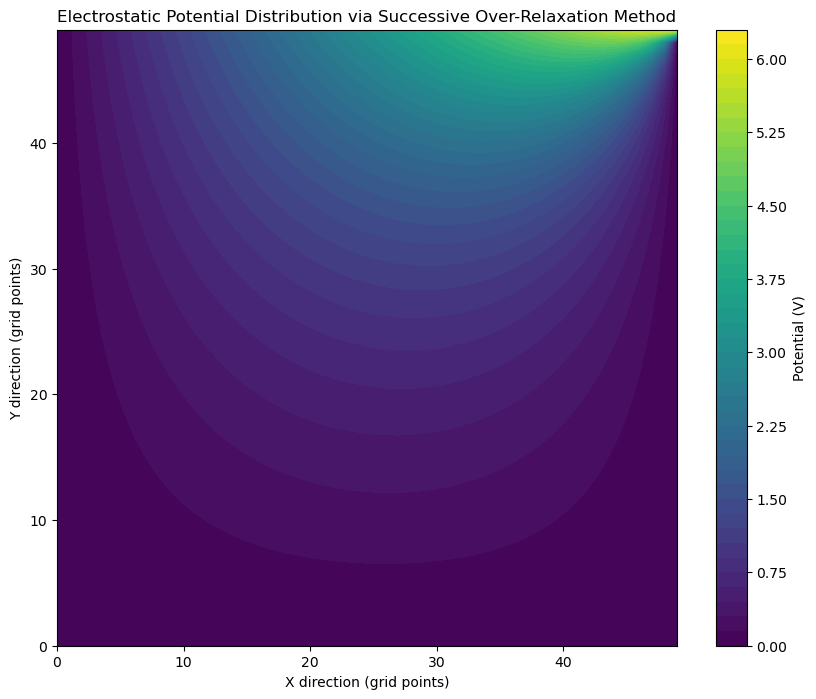

In [18]:
import numpy as np
import time
import matplotlib.pyplot as plt

def calculate_error(old_potential, new_potential):
    """
    Calculate the total relative error between two potential distributions.
    
    Parameters:
    - old_potential (np.ndarray): The potential distribution from the previous iteration.
    - new_potential (np.ndarray): The updated potential distribution from the current iteration.
    
    Returns:
    - float: The sum of the absolute relative errors across all points in the grid.
    """
    errs = np.abs((new_potential - old_potential) / np.where(new_potential != 0, new_potential, 1))
    return np.sum(errs)

def SOR(potential, omega, kmax=10000, tol=1e-4):
    """
    Solve the electrostatic potential using the Successive Overrelaxation (SOR) method.
    
    Parameters:
    - potential (np.ndarray): The initial grid of potential values, including boundary conditions.
    - omega (float): The relaxation factor used to accelerate convergence.
    - kmax (int): The maximum number of iterations to perform.
    - tol (float): The tolerance for convergence, based on the total error.
    
    Returns:
    - np.ndarray: The converged potential distribution, or None if convergence was not achieved.
    - int: The number of iterations performed.
    - float: The execution time in seconds.
    """
    start_time = time.time()
    Ny, Nx = potential.shape
    for k in range(kmax):
        old_potential = np.copy(potential)
        for i in range(1, Ny - 1):
            for j in range(1, Nx - 1):
                new_value = 0.25 * (potential[i+1, j] + potential[i-1, j] +
                                    potential[i, j+1] + potential[i, j-1])
                potential[i, j] = potential[i, j] + omega * (new_value - potential[i, j])
        
        err = calculate_error(old_potential[1:-1, 1:-1], potential[1:-1, 1:-1])
        if err < tol:
            s_time = time.time() - start_time
            return potential, k + 1, s_time
    s_time = time.time() - start_time
    return None, kmax, s_time

# Problem setup
L, H = 1.0, 1.0  # Pipe dimensions
Nx, Ny = 50, 50  # Grid size
V_0 = np.linspace(0,2*np.pi)  # Boundary condition at the top

# Initialize potential array and set boundary conditions
potential = np.zeros((Ny, Nx))
potential[:, 0] = 0  # Left side
potential[:, -1] = 0  # Right side
potential[0, :] = 0  # Bottom side
potential[-1, :] = V_0  # Top side

omega = 1.5  # Relaxation factor
solved_potential, s_iterations, s_time = SOR(potential, omega)
print(f"SOR Method (ω={omega}): Converged in {s_iterations} iterations, taking {s_time:.4f} seconds.")

# Visualization
if solved_potential is not None:
    plt.figure(figsize=(10, 8))
    plt.contourf(solved_potential, 50, cmap='viridis')
    plt.colorbar(label='Potential (V)')
    plt.title('Electrostatic Potential Distribution via Successive Over-Relaxation Method')
    plt.xlabel('X direction (grid points)')
    plt.ylabel('Y direction (grid points)')
    plt.show()


### Part 2.4: Comparing the Three Methods with the New Potential

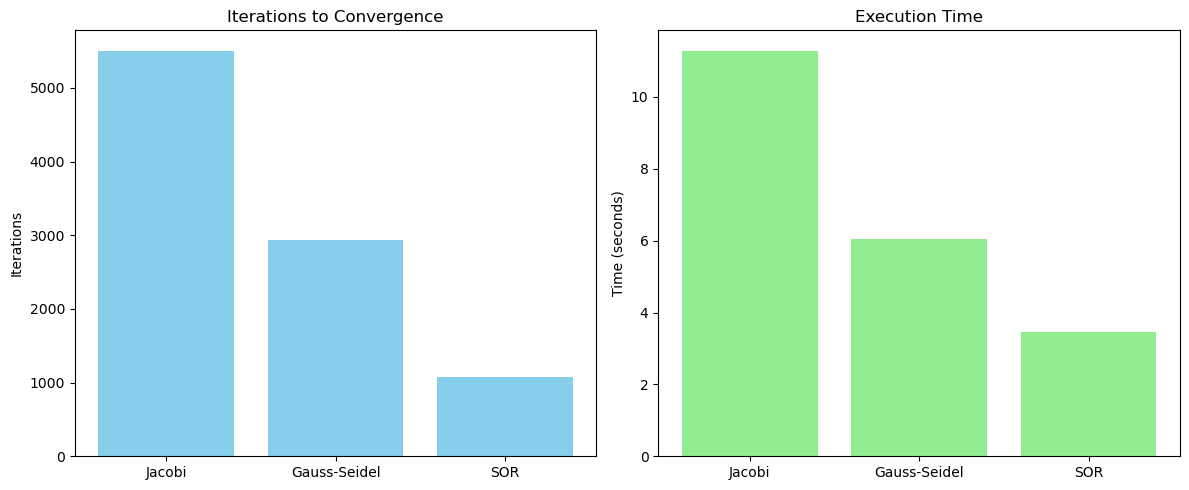

In [12]:
methods = ['Jacobi', 'Gauss-Seidel', 'SOR']
iterations = [j_iterations, g_iterations, s_iterations]  
execution_times = [j_time, g_time, s_time]

plt.figure(figsize=(12, 5))

# Plotting iterations
plt.subplot(1, 2, 1)
plt.bar(methods, iterations, color='skyblue')
plt.title('Iterations to Convergence')
plt.ylabel('Iterations')

# Plotting execution time
plt.subplot(1, 2, 2)
plt.bar(methods, execution_times, color='lightgreen')
plt.title('Execution Time')
plt.ylabel('Time (seconds)')

plt.tight_layout()
plt.show()

As expected the Successive Overrelaxation Method has the lowest execution time as well as the least number of iterations taken to converge. 

## Results and Discussion

_(What did you find when you carried out your methods? Some of your code related to presenting results/figures/data may be replicated from the methods section or may only be present in
this section.
All of the plots that you plan on using for your presentation should be present in this section)_

### Part 3: Looking at Comparison Graphs Again

### Part 3.1: Observations

##  Conclusion and Perspectives

### Part 4: Obstacles

_(What did you learn from your results? 
What obstacles did you run into? 
What would you do differently next time? 
Clearly provide quantitative answers to your question(s)?  At least one of your questions should be answered with numbers.  That is, it is not sufficient to answer "yes" or "no", but rather to say something quantitative such as variable 1 increased roughly 10% for every 1 year increase in variable 2.)_

## References

1. Electrostatic Potential by the Relaxation Method. (n.d.). Retrieved April 11, 2024, from https://physics.weber.edu/schroeder/javacourse/relaxation.pdf
2. Iterative Methods for Solving Ax = b - The SOR Method | Mathematical Association of America. (n.d.). Maa.org. https://maa.org/press/periodicals/loci/joma/iterative-methods-for-solving-iaxi-ibi-the-sor-method
3. Successive over-relaxation. (2024, February 15). Wikipedia. https://en.wikipedia.org/wiki/Successive_over-relaxation#:~:text=In%20numerical%20linear%20algebra%2C%20the
4. Weisstein, E. W. (n.d.). Successive Overrelaxation Method. Mathworld.wolfram.com. https://mathworld.wolfram.com/SuccessiveOverrelaxationMethod.html


**Important:** if you use **any** code that you find on the internet for your project you **must** cite it or you risk losing most/all of the points for you project.)_

##  Appendices
